## Observations and Insights

In [45]:
# 3 Oberservations & Inferences
#
# 1. There is a strong correlation between the Weight (g) of a mouse, and its Average Tumor Volume (mm3) for the
# Capomulin regimen. As the Weight (g) of the mouse increases, so does the Average Tumor Volume (mm3). From this,
# we can infer that the Capomulin regimen has a higher success rate when there is less mass present in which it can
# disperse. In other words, the heavier the mouse, the less successful the regimen.
#
# 2. All regimens other than Ramicane and Capomulin yielded Average Tumor Volumes (mm3) between the ranges of 52 
# and 55, while Ramicane and Capomulin yielded Average Tumor Volumes (mm3) of 40.22 and 40.68 respectively. Because 
# all other regimens fell into the same range (52 to 55 mm3) as the Placebo regimen, which should yield no drug 
# -related effect on the tumors, we can infer that the other regimens yielded little to no drug-related effects on the 
# tumors.
# 
# 3. Ramicane and Capomulin were the only regimens that resulted in a decreased Final Tumor Volume (mm3). All other 
# regimens yielded higher Final Tumor Volumes (mm3) than the Starting Tumor Volumes (mm3). We can see that Ramicane
# and Capomulin were the only two successful regimens in the study. 

## Dependencies and starter code

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [47]:
# Look at Drug Regimen & Tumor Volume
total_tumor_vol = mouse_data_complete[["Drug Regimen","Tumor Volume (mm3)"]]

# Group by Drug Regimen & Calculate Average of Tumor Volume
regimen_grouped = total_tumor_vol.groupby(["Drug Regimen"])
average_tumor_vol = regimen_grouped.mean()

# Calculate Median of Tumor Volume
regimen_grouped = total_tumor_vol.groupby(["Drug Regimen"])
median_tumor_vol = regimen_grouped.median()

# Calculate Variance, Standard Deviation & Standard Error
tumor_variance = (total_tumor_vol.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"])
tumor_sd = (total_tumor_vol.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"])
tumor_sem = (total_tumor_vol.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"])

# Merge Standard Deviation & Error
tumor_sd_and_sem = pd.merge(tumor_sd, tumor_sem, how="left", on=["Drug Regimen"])

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Merge and Rename above tables for Summary Table
mouse_mean_median = pd.merge(average_tumor_vol, median_tumor_vol, how="left", on=["Drug Regimen"])
mouse_mean_median = mouse_mean_median.rename(columns={"Tumor Volume (mm3)_x":"Average Tumor Volume (mm3)","Tumor Volume (mm3)_y":"Median Tumor Volume (mm3)"})
mouse_mean_median_var = pd.merge(mouse_mean_median, tumor_variance, how="left", on=["Drug Regimen"])
mouse_mean_median_var = mouse_mean_median_var.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance (mm3)"})
mouse_summary_data = pd.merge(mouse_mean_median_var, tumor_sd_and_sem, how="left", on=["Drug Regimen"])

# Final Summary Table
mouse_summary_data = mouse_summary_data.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume (mm3) Standard Deviation","Tumor Volume (mm3)_y":"Tumor Volume (mm3) Standard Error"})
mouse_summary_data

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance (mm3),Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Count number of times each regimen was used
regimen_dp = mouse_data_complete["Drug Regimen"].value_counts()

# Add Regimen Data Points to Mouse Summary Data
mouse_summary_data["Data Points"] = regimen_dp
mouse_summary_data = mouse_summary_data[["Data Points", "Average Tumor Volume (mm3)", "Median Tumor Volume (mm3)", "Tumor Volume Variance (mm3)", "Tumor Volume (mm3) Standard Deviation", "Tumor Volume (mm3) Standard Error"]]

In [50]:
# Only look Data Points columns
mouse_summary_data_dp = mouse_summary_data[["Data Points"]]

## Bar plots

Text(0.5, 1.0, 'Drug Regimen Data Points')

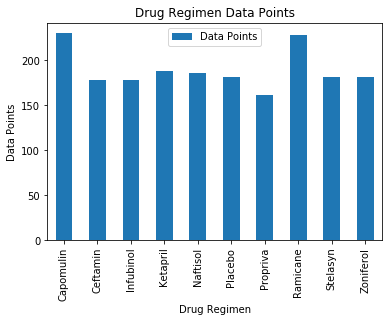

In [51]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_summary_data_dp.plot.bar()
plt.ylabel('Data Points')
plt.xlabel('Drug Regimen')
plt.title('Drug Regimen Data Points')

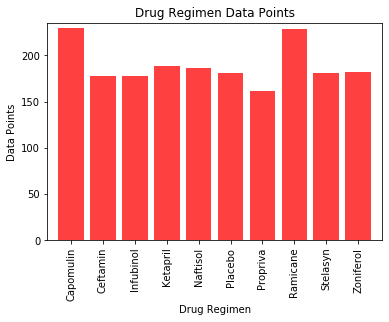

In [52]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(0, len(mouse_summary_data_dp))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Drug Regimen Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

plt.xlim(-0.75, len(mouse_summary_data_dp)-.25)
plt.ylim(0, max(mouse_summary_data_dp['Data Points']) + 5)

plt.bar(x_axis, mouse_summary_data_dp['Data Points'], facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, mouse_summary_data_dp.index, rotation='vertical')
plt.show()

In [53]:
# Calculate amount of Females and Males used
gender_counts = mouse_data_complete["Sex"].value_counts()
gender_counts

Male      958
Female    935
Name: Sex, dtype: int64

## Pie plots

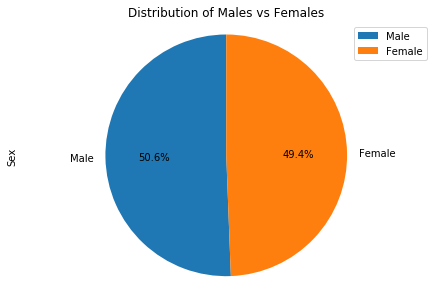

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts.plot.pie(autopct='%1.1f%%',startangle=90)
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of Males vs Females")
plt.ylabel("Sex")
plt.legend(loc='best')

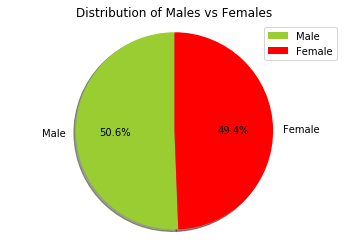

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
count = [958, 935]
colors = ["yellowgreen", "red"]

plt.title("Distribution of Males vs Females")
plt.pie(count, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.legend(loc='best')
plt.show()

## Quartiles, outliers and boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Show top 5 most promising treatment regimens
best_regimens = mouse_summary_data.sort_values(by="Average Tumor Volume (mm3)", ascending=True)
display(best_regimens.head(5))

# Ramicane, Capomulin, Infubinol, and Ceftamin

ramicane_summary = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"] == "Ramicane")]
capomulin_summary = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"] == "Capomulin")]
infubinol_summary = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"] == "Infubinol")]
ceftamin_summary = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"] == "Ceftamin")]

print("Regimen Quartiles, IQR, and Outliers")
print(" ")

# Ramicane Data

# Calculate Final Tumor Volume

ftv_ramicane = ramicane_summary.groupby('Mouse ID').last()
ftv_ramicane = ftv_ramicane[["Tumor Volume (mm3)"]]
ftv_ramicane = ftv_ramicane.rename(columns={"Tumor Volume (mm3)":"Ramicane Final Tumor Volume (mm3)"})

# Calculate IQR

ram_volumes = ftv_ramicane['Ramicane Final Tumor Volume (mm3)']
ram_quartiles = ram_volumes.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_midq = ram_quartiles[0.5]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
print(f"Ramicane Lower Quartile: {ram_lowerq}")
print(f"Ramicane Middle Quartile: {ram_midq}")
print(f"Ramicane Upper Quartile: {ram_upperq}")
print(f"Ramicane IQR: {ram_iqr}")

# Determine Potential Outliers

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

ramicane_low_outliers = ftv_ramicane.loc[(ftv_ramicane["Ramicane Final Tumor Volume (mm3)"] < 17.912)]
ramicane_upper_outliers = ftv_ramicane.loc[(ftv_ramicane["Ramicane Final Tumor Volume (mm3)"] > 54.307)]
print("Ramicane - No Outliers")
print("-----------------------")

# Capomulin Data

# Calculate Final Tumor Volume

ftv_capomulin = capomulin_summary.groupby('Mouse ID').last()
ftv_capomulin = ftv_capomulin[["Tumor Volume (mm3)"]]
ftv_capomulin = ftv_capomulin.rename(columns={"Tumor Volume (mm3)":"Capomulin Final Tumor Volume (mm3)"})

# Calculate IQR

cap_volumes = ftv_capomulin['Capomulin Final Tumor Volume (mm3)']
cap_quartiles = cap_volumes.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_midq = cap_quartiles[0.5]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
print(f"Capomulin Lower Quartile: {cap_lowerq}")
print(f"Capomulin Middle Quartile: {cap_midq}")
print(f"Capomulin Upper Quartile: {cap_upperq}")
print(f"Capomulin IQR: {cap_iqr}")

# Determine Potential Outliers

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

capomulin_low_outliers = ftv_capomulin.loc[(ftv_capomulin["Capomulin Final Tumor Volume (mm3)"] < 20.705)]
capomulin_upper_outliers = ftv_capomulin.loc[(ftv_capomulin["Capomulin Final Tumor Volume (mm3)"] > 51.832)]
print("Capomulin - No Outliers")
print("-----------------------")

# Infubinol Data

# Calculate Final Tumor Volume

ftv_infubinol = infubinol_summary.groupby('Mouse ID').last()
ftv_infubinol = ftv_infubinol[["Tumor Volume (mm3)"]]
ftv_infubinol = ftv_infubinol.rename(columns={"Tumor Volume (mm3)":"Infubinol Final Tumor Volume (mm3)"})

# Calculate IQR

inf_volumes = ftv_infubinol['Infubinol Final Tumor Volume (mm3)']
inf_quartiles = inf_volumes.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_midq = inf_quartiles[0.5]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
print(f"Infubinol Lower Quartile: {inf_lowerq}")
print(f"Infubinol Middle Quartile: {inf_midq}")
print(f"Infubinol Upper Quartile: {inf_upperq}")
print(f"Infubinol IQR: {inf_iqr}")

# Determine Potential Outliers

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

infubinol_low_outliers = ftv_infubinol.loc[(ftv_infubinol["Infubinol Final Tumor Volume (mm3)"] < 36.833)]
infubinol_upper_outliers = ftv_infubinol.loc[(ftv_infubinol["Infubinol Final Tumor Volume (mm3)"] > 82.741)]
print("Infubinol - One Outlier - Mouse ID: c326 - Final Mouse Tumor Volume (mm3): 36.321346")
print("-----------------------")

# Ceftamin Data

# Calculate Final Tumor Volume

ftv_ceftamin = ceftamin_summary.groupby('Mouse ID').last()
ftv_ceftamin = ftv_ceftamin[["Tumor Volume (mm3)"]]
ftv_ceftamin = ftv_ceftamin.rename(columns={"Tumor Volume (mm3)":"Ceftamin Final Tumor Volume (mm3)"})

# Calculate IQR

ceft_volumes = ftv_ceftamin['Ceftamin Final Tumor Volume (mm3)']
ceft_quartiles = ceft_volumes.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_midq = ceft_quartiles[0.5]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq
print(f"Ceftamin Lower Quartile: {ceft_lowerq}")
print(f"Ceftamin Middle Quartile: {ceft_midq}")
print(f"Ceftamin Upper Quartile: {ceft_upperq}")
print(f"Ceftamin IQR: {ceft_iqr}")

# Determine Potential Outliers

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.")

ceftamin_low_outliers = ftv_ceftamin.loc[(ftv_ceftamin["Ceftamin Final Tumor Volume (mm3)"] < 28.550)]
ceftamin_upper_outliers = ftv_ceftamin.loc[(ftv_ceftamin["Ceftamin Final Tumor Volume (mm3)"] > 84.472)]
print("Ceftamin - No Outliers")

,Data Points,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance (mm3),Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) Standard Error
Drug Regimen,,,,,,
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236


Regimen Quartiles, IQR, and Outliers
 
Ramicane Lower Quartile: 31.56046955
Ramicane Middle Quartile: 36.56165229
Ramicane Upper Quartile: 40.65900627
Ramicane IQR: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane - No Outliers
-----------------------
Capomulin Lower Quartile: 32.37735684
Capomulin Middle Quartile: 38.125164399999996
Capomulin Upper Quartile: 40.1592203
Capomulin IQR: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin - No Outliers
-----------------------
Infubinol Lower Quartile: 54.04860769
Infubinol Middle Quartile: 60.16518046
Infubinol Upper Quartile: 65.52574285
Infubinol IQR: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol - One Outlier - Mouse ID: c326 - Final Mouse Tumor Volume (mm3): 36.321346
-----------------------
Ceftamin Lower Quarti

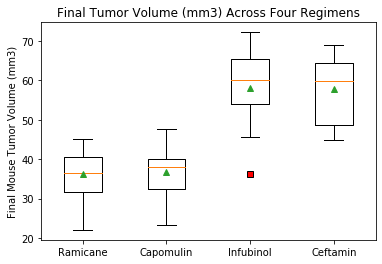

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [ram_volumes, cap_volumes, inf_volumes, ceft_volumes]
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3) Across Four Regimens')
ax1.boxplot(data,flierprops=red_square,showmeans=True)
ax1.set_ylabel('Final Mouse Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and scatter plots

Text(0.5, 0, 'Timepoint')

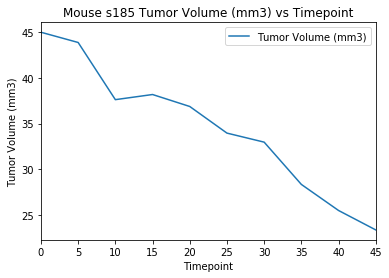

In [58]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Gather only Capomulin Data
capomulin_summary = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"] == "Capomulin")]

# Search for one mouse - will use Mouse ID (s185)
mouse_s185 = capomulin_summary.loc[(capomulin_summary["Mouse ID"] == "s185")]

# Look at s185's Timepoint & Tumor Volume
mouse_s185 = mouse_s185[["Timepoint","Tumor Volume (mm3)"]]

# Generate Line Plot of Timepoint and Tumor Volume
mouse_s185.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title("Mouse s185 Tumor Volume (mm3) vs Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

Text(0.5, 0, 'Average Tumor Volume (mm3)')

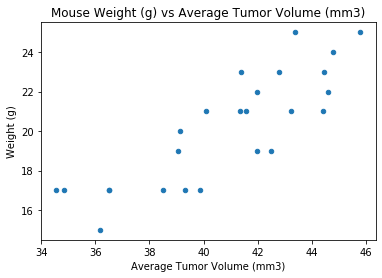

In [65]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Gather only Capomulin data
capomulin_summary = mouse_data_complete.loc[(mouse_data_complete["Drug Regimen"] == "Capomulin")]

# Calculate the average tumor volume of each mouse
avg_tumor_vol = capomulin_summary.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

# Gather each mouse's weight
mouse_weight = capomulin_summary.groupby("Mouse ID").mean()["Weight (g)"]

# Create a Dataframe with Weight and Tumor Volume
weight_vs_volume = pd.merge(avg_tumor_vol, mouse_weight, how="left", on=["Mouse ID"])

# Generate Scatter Plot of Weight and Tumor Volume
weight_vs_volume.plot.scatter(x='Tumor Volume (mm3)', y='Weight (g)')
plt.title("Mouse Weight (g) vs Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.xlabel("Average Tumor Volume (mm3)")

The correlation between Tumor Volume (mm3) and Weight (g) is 0.84.


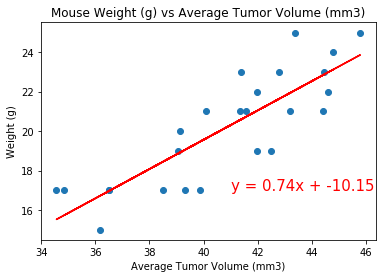

In [66]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_vs_volume['Tumor Volume (mm3)']
y_values = weight_vs_volume['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(41,17),fontsize=15,color="red")
plt.title("Mouse Weight (g) vs Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.xlabel("Average Tumor Volume (mm3)")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Tumor Volume (mm3) and Weight (g) is {round(correlation[0],2)}.")